# Econometrics 

## Regresión simple

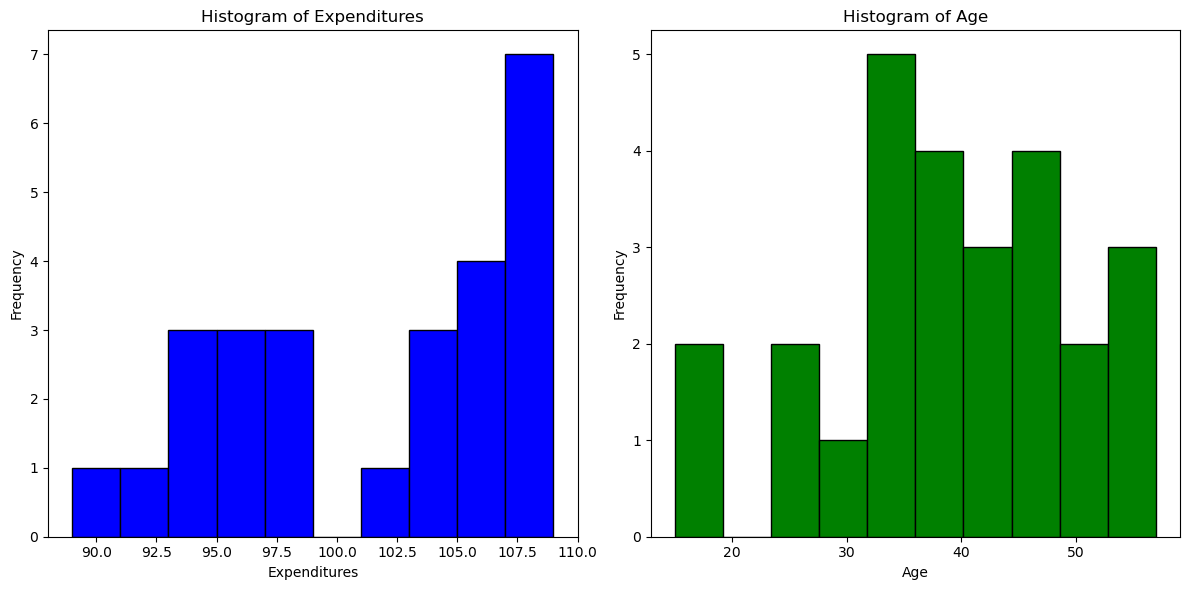

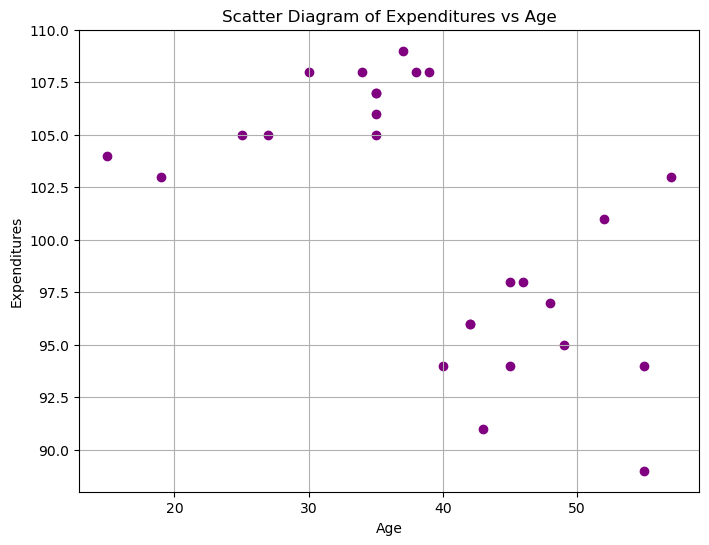

In [2]:
!pip install xlrd

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the uploaded file
file_path = file_path = 'C:/Users/Gerardo/Documents/Data Science/TrainExer11.xls'
data = pd.read_excel(file_path)

# Check the first few rows of the dataset to understand its structure
data.head()

# Histogram for Expenditures
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(data['Expenditures'], color='blue', edgecolor='black')
plt.title('Histogram of Expenditures')
plt.xlabel('Expenditures')
plt.ylabel('Frequency')

# Histogram for Age
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(data['Age'], color='green', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()

# Scatter plot of Expenditures vs Age
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Expenditures'], color='purple')
plt.title('Scatter Diagram of Expenditures vs Age')
plt.xlabel('Age')
plt.ylabel('Expenditures')
plt.grid(True)
plt.show()


In [3]:
# Compute the overall mean of expenditures
overall_mean_expenditures = data['Expenditures'].mean()

# Compute the mean of expenditures for clients 40 and older
mean_expenditures_40_and_older = data[data['Age'] >= 40]['Expenditures'].mean()

# Compute the mean of expenditures for clients younger than 40
mean_expenditures_younger_than_40 = data[data['Age'] < 40]['Expenditures'].mean()

(overall_mean_expenditures, mean_expenditures_40_and_older, mean_expenditures_younger_than_40)


(101.11538461538461, 95.84615384615384, 106.38461538461539)

## Ejercicio 2

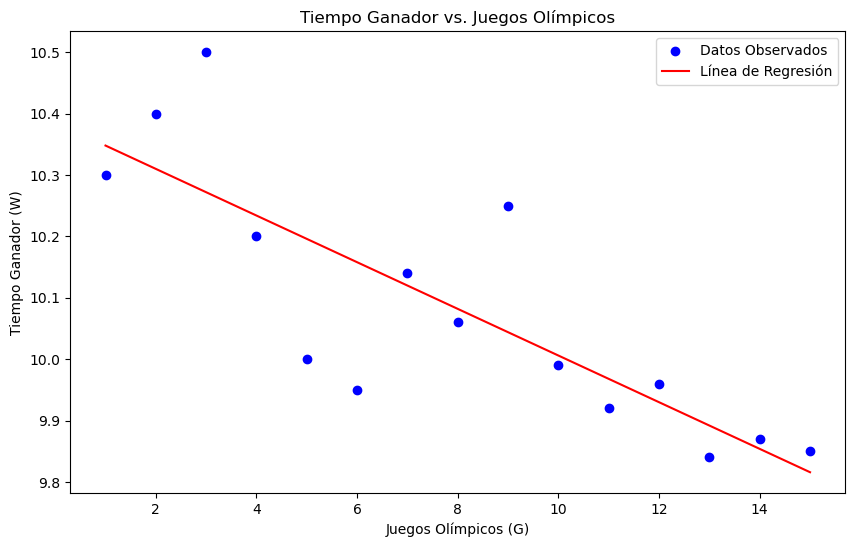

(10.386000000000003,
 -0.0380000000000002,
 0.6733728599027355,
 0.12282570515227721)

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
data = pd.read_excel('TrainExer13.xls')

# Asignar 'Game' como la variable independiente y 'Winning time men' como la variable dependiente
G = data['Game']
W = data['Winning time men']

# Agregar una constante al modelo para el intercepto
G_sm = sm.add_constant(G)

# Ajustar el modelo de regresión lineal
model = sm.OLS(W, G_sm).fit()

# Obtener los coeficientes a (intercepto) y b (pendiente), R-cuadrado y la varianza del error
a = model.params[0]
b = model.params[1]
R_squared = model.rsquared
s = np.sqrt(model.scale)

# Realizar predicciones basadas en el modelo ajustado
W_pred = model.predict(G_sm)

# Graficar el scatter plot y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(G, W, color='blue', label='Datos Observados')
plt.plot(G, W_pred, color='red', label='Línea de Regresión')
plt.title('Tiempo Ganador vs. Juegos Olímpicos')
plt.xlabel('Juegos Olímpicos (G)')
plt.ylabel('Tiempo Ganador (W)')
plt.legend()
plt.show()

# Imprimir los resultados
a, b, R_squared, s


In [5]:
# Crear un DataFrame con las nuevas observaciones para predecir
new_data = pd.DataFrame({'Game': [16, 17, 18]})
new_data = sm.add_constant(new_data)  # Agregar la constante para el intercepto

# Realizar predicciones para las nuevas observaciones
predictions = model.predict(new_data)

predictions


0    9.778
1    9.740
2    9.702
dtype: float64

# Training exercise 1.5

Regresión lineal para tendencias lineales y no lineales.

Para aplicar una regresión lineal a un modelo cuyas ganancias relativas son fijas, pero no sigue una estructura lineal (ej. exponencial) primero hay quelinealizar la relación por medio de una logaritmización.


## Modelo Lineal
Se analiza cuándo es que los corredores hombres y mujeres tendrán un resultado igual en un modelo lineal

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Cargar el conjunto de datos
data = pd.read_excel('TrainExer15.xls')

# Ajustar el modelo de regresión lineal para los hombres
men_linear_model = sm.OLS(data['Winning time men'], sm.add_constant(data['Game'])).fit()

# Ajustar el modelo de regresión lineal para las mujeres
women_linear_model = sm.OLS(data['Winning time women'], sm.add_constant(data['Game'])).fit()

# Función para calcular el año en que los tiempos serán iguales
def predict_year_of_equality(men_model, women_model):
    # Resolver para el Game donde los tiempos son iguales
    Game = (men_model.params[0] - women_model.params[0]) / (women_model.params[1] - men_model.params[1])
    # Convertir Game a año
    year = 1948 + (Game - 1) * 4
    return year

# Predicción del año en que los tiempos serán iguales para el modelo lineal
year_of_equality_linear = predict_year_of_equality(men_linear_model, women_linear_model)

# Para calcular el tiempo ganador igual para el modelo lineal
winning_time_equal = men_linear_model.params[0] + men_linear_model.params[1] * (year_of_equality_linear - 1948) / 4

year_of_equality_linear, winning_time_equal


(2139.774594078321, 8.564141356255943)

## No lineal
Se utiliza la logaritmización de los datos para linealizar el modelo, pues tiempos de 0 o negativos no hacen sentido, por lo que lógicamente no siguen una estructura lineal.

### 2008 y 2012

In [6]:
import numpy as np

# Coeficientes proporcionados en la diapositiva para hombres y mujeres
alpha_men = 2.341
beta_men = -0.0038
alpha_women = 2.452
beta_women = -0.0056

# Calculamos las predicciones para los años 2008 (G_i = 16) y 2012 (G_i = 17) usando el modelo no lineal
# Para hombres
time_men_2008_nonlinear = np.exp(alpha_men + beta_men * 16)
time_men_2012_nonlinear = np.exp(alpha_men + beta_men * 17)

# Para mujeres
time_women_2008_nonlinear = np.exp(alpha_women + beta_women * 16)
time_women_2012_nonlinear = np.exp(alpha_women + beta_women * 17)

(time_men_2008_nonlinear, time_men_2012_nonlinear, time_women_2008_nonlinear, time_women_2012_nonlinear)


(9.778635941157457, 9.741547636988562, 10.616400262276006, 10.557114575662954)

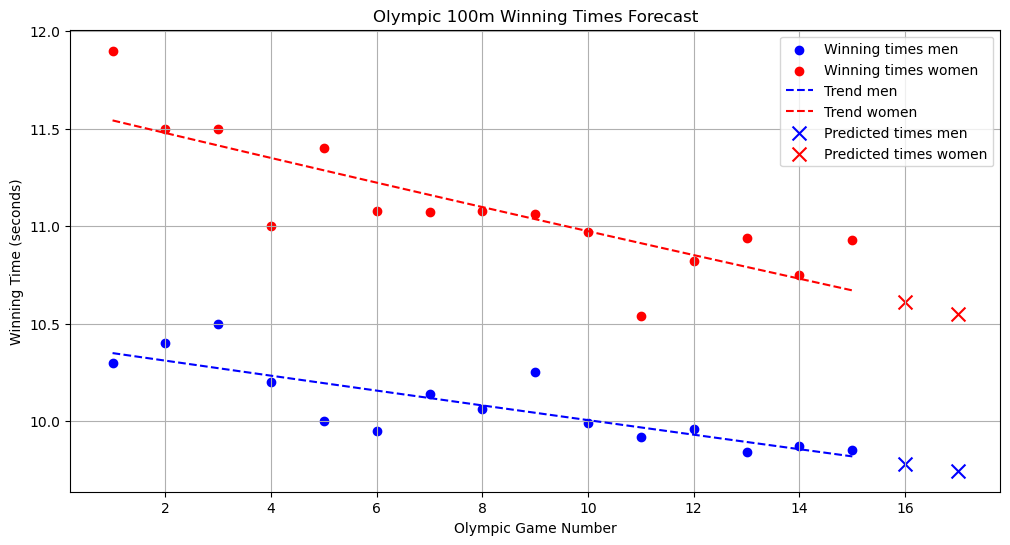

,Game,Year,Winning time men (predicted),Winning time women (predicted)
0,16,2008,9.781655,10.610481
1,17,2012,9.744985,10.551092


In [8]:
# Vamos a realizar los cálculos necesarios para el ejercicio y crear los gráficos correspondientes
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ipywidgets import interact

# Cargamos los datos del archivo proporcionado (asegúrate de que la ruta sea correcta)
data = pd.read_excel('TrainExer15.xls')

# Extraemos las variables relevantes
G = data['Game']
W_men = data['Winning time men']
W_women = data['Winning time women']

# Ajustamos los modelos no lineales a través de la transformación logarítmica
W_men_log = np.log(W_men)
W_women_log = np.log(W_women)

# Añadimos la constante para el intercepto
G_const = sm.add_constant(G)

# Ajustamos el modelo OLS para hombres y mujeres
model_men = sm.OLS(W_men_log, G_const).fit()
model_women = sm.OLS(W_women_log, G_const).fit()

# Extraemos los coeficientes para hombres y mujeres
alpha_men, beta_men = model_men.params
alpha_women, beta_women = model_women.params

# Creamos una función para predecir los tiempos basados en el modelo no lineal
def predict_time(alpha, beta, game):
    return np.exp(alpha + beta * game)

# Realizamos las predicciones para los juegos futuros
games_future = np.array([16, 17])  # Corresponden a 2008 y 2012
times_men_future = predict_time(alpha_men, beta_men, games_future)
times_women_future = predict_time(alpha_women, beta_women, games_future)

# Creamos una función para graficar
def plot_win_times(G, W_men, W_women, model_men, model_women):
    plt.figure(figsize=(12, 6))

    # Graficamos los datos reales
    plt.scatter(G, W_men, color='blue', label='Winning times men')
    plt.scatter(G, W_women, color='red', label='Winning times women')

    # Graficamos las líneas de tendencia basadas en los modelos
    G_range = np.linspace(min(G), max(G), 100)
    plt.plot(G_range, np.exp(model_men.params[0] + model_men.params[1] * G_range), color='blue', linestyle='--', label='Trend men')
    plt.plot(G_range, np.exp(model_women.params[0] + model_women.params[1] * G_range), color='red', linestyle='--', label='Trend women')

    # Añadimos las predicciones para los juegos futuros
    plt.scatter(games_future, times_men_future, color='blue', marker='x', s=100, label='Predicted times men')
    plt.scatter(games_future, times_women_future, color='red', marker='x', s=100, label='Predicted times women')

    plt.title('Olympic 100m Winning Times Forecast')
    plt.xlabel('Olympic Game Number')
    plt.ylabel('Winning Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutamos la función de graficado
plot_win_times(G, W_men, W_women, model_men, model_women)

# Resultados de las predicciones
predictions_df = pd.DataFrame({
    'Game': games_future,
    'Year': 1948 + (games_future - 1) * 4,
    'Winning time men (predicted)': times_men_future,
    'Winning time women (predicted)': times_women_future
})

predictions_df


### Cuándo se igualan los resultados si la tendencia no lineal continúa?


(a) El modelo de tendencia lineal predice tiempos ganadores iguales alrededor del año 2139.2000000000003.
(b) El modelo de tendencia no lineal predice tiempos ganadores iguales alrededor del año 2190.666666666666.
(c) El modelo de tendencia lineal predice tiempos ganadores iguales de aproximadamente 8.53 segundos.
(d) Estos resultados deben tomarse con cautela. Las predicciones a largo plazo son altamente inciertas y sujetas a muchos factores no considerados en los modelos simples.


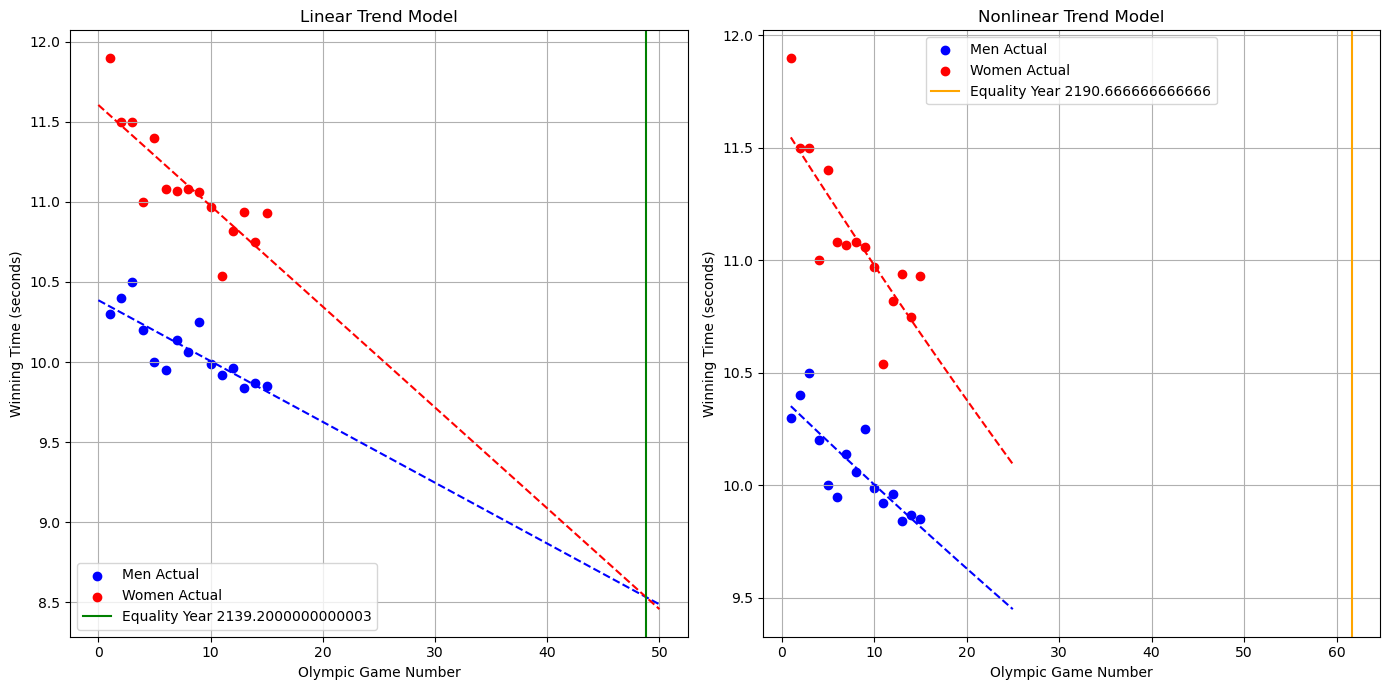

In [14]:
# Recalcular los años en que los tiempos ganadores de hombres y mujeres serán iguales según los modelos lineal y no lineal
# y generar gráficos que reflejen correctamente estas predicciones.

# Utilizamos los coeficientes de las diapositivas para hombres y mujeres.
# Coeficientes para el modelo lineal
a_men_linear = 10.386
b_men_linear = -0.038
a_women_linear = 11.606
b_women_linear = -0.063

# Coeficientes para el modelo no lineal (logarítmico)
alpha_men_nonlinear = 2.341
beta_men_nonlinear = -0.0038
alpha_women_nonlinear = 2.452
beta_women_nonlinear = -0.0056

# Función para predecir tiempos de ganadores utilizando modelos lineales
def predict_linear(a, b, game_number):
    return a + b * game_number

# Función para predecir tiempos de ganadores utilizando modelos no lineales
def predict_nonlinear(alpha, beta, game_number):
    return np.exp(alpha + beta * game_number)

# Función para encontrar el punto de igualdad en los modelos lineales
def find_equality_linear(a_men, b_men, a_women, b_women):
    game_equal = (a_women - a_men) / (b_men - b_women)
    year_equal = 1948 + (game_equal - 1) * 4
    time_equal = predict_linear(a_men, b_men, game_equal)
    return year_equal, time_equal

# Función para encontrar el punto de igualdad en los modelos no lineales
def find_equality_nonlinear(alpha_men, beta_men, alpha_women, beta_women):
    game_equal = (alpha_women - alpha_men) / (beta_men - beta_women)
    year_equal = 1948 + (game_equal - 1) * 4
    time_equal = predict_nonlinear(alpha_men, beta_men, game_equal)
    return year_equal, time_equal

# Punto de igualdad para el modelo lineal
year_equal_linear, time_equal_linear = find_equality_linear(a_men_linear, b_men_linear, a_women_linear, b_women_linear)

# Punto de igualdad para el modelo no lineal
year_equal_nonlinear, time_equal_nonlinear = find_equality_nonlinear(alpha_men_nonlinear, beta_men_nonlinear, alpha_women_nonlinear, beta_women_nonlinear)

# Comentario sobre los resultados
comment = f"""
(a) El modelo de tendencia lineal predice tiempos ganadores iguales alrededor del año {year_equal_linear}.
(b) El modelo de tendencia no lineal predice tiempos ganadores iguales alrededor del año {year_equal_nonlinear}.
(c) El modelo de tendencia lineal predice tiempos ganadores iguales de aproximadamente {time_equal_linear:.2f} segundos.
(d) Estos resultados deben tomarse con cautela. Las predicciones a largo plazo son altamente inciertas y sujetas a muchos factores no considerados en los modelos simples."""

# Imprimir los comentarios
print(comment)

# Gráficos de los resultados
# Para los modelos lineales
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Linear Trend Model')
plt.xlabel('Olympic Game Number')
plt.ylabel('Winning Time (seconds)')
plt.grid(True)
# Tiempos ganadores actuales para hombres y mujeres
plt.scatter(data['Game'], data['Winning time men'], color='blue', label='Men Actual')
plt.scatter(data['Game'], data['Winning time women'], color='red', label='Women Actual')
# Línea de tendencia para igualdad de tiempos
plt.plot([0, 50], [predict_linear(a_men_linear, b_men_linear, 0), predict_linear(a_men_linear, b_men_linear, 50)], color='blue', linestyle='--')
plt.plot([0, 50], [predict_linear(a_women_linear, b_women_linear, 0), predict_linear(a_women_linear, b_women_linear, 50)], color='red', linestyle='--')
plt.axvline((year_equal_linear - 1948) / 4 + 1, color='green', linestyle='-', label=f'Equality Year {year_equal_linear}')
plt.legend()

# Para los modelos no lineales
plt.subplot(1, 2, 2)
plt.title('Nonlinear Trend Model')
plt.xlabel('Olympic Game Number')
plt.ylabel('Winning Time (seconds)')
plt.grid(True)
# Tiempos ganadores actuales para hombres y mujeres
plt.scatter(data['Game'], data['Winning time men'], color='blue', label='Men Actual')
plt.scatter(data['Game'], data['Winning time women'], color='red', label='Women Actual')
# Línea de tendencia para igualdad de tiempos
games_range = np.linspace(1, max(data['Game']) + 10, 300)  # Extender el rango para el futuro
plt.plot(games_range, predict_nonlinear(alpha_men_nonlinear, beta_men_nonlinear, games_range), color='blue', linestyle='--')
plt.plot(games_range, predict_nonlinear(alpha_women_nonlinear, beta_women_nonlinear, games_range), color='red', linestyle='--')
plt.axvline((year_equal_nonlinear - 1948) / 4 + 1, color='orange', linestyle='-', label=f'Equality Year {year_equal_nonlinear}')
plt.legend()

plt.tight_layout()
plt.show()




# Evaluación

                            OLS Regression Results                            
Dep. Variable:           Expenditures   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     12.24
Date:                Tue, 02 Jan 2024   Prob (F-statistic):            0.00185
Time:                        12:22:52   Log-Likelihood:                -78.076
No. Observations:                  26   AIC:                             160.2
Df Residuals:                      24   BIC:                             162.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.2411      3.882     29.428      0.0

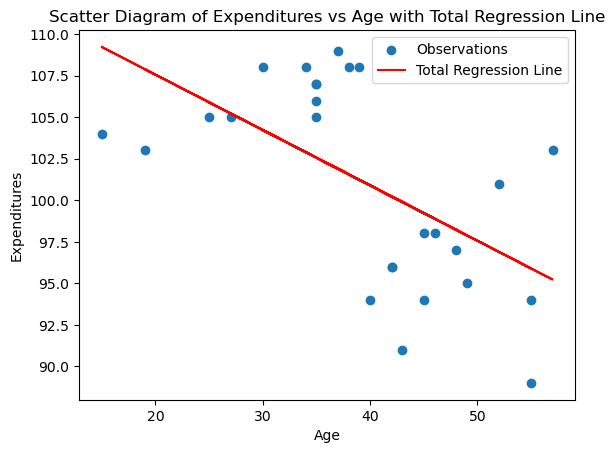

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Asegúrate de que la ruta al archivo Excel sea la correcta
data = pd.read_excel('TestExer1-holiday expenditures-round2.xls')

# (a) Estimar los coeficientes a y b en un modelo de regresión simple para toda la muestra
X = sm.add_constant(data['Age'])  # Añadir una constante para el término del intercepto
y = data['Expenditures']
model_total = sm.OLS(y, X).fit()

# Imprimir los resultados de la regresión para toda la muestra
print(model_total.summary())

# Guardar los coeficientes, errores estándar y valores t
a_total = model_total.params['const']
b_total = model_total.params['Age']
se_b_total = model_total.bse['Age']
t_value_b_total = model_total.tvalues['Age']

# Crear el diagrama de dispersión y agregar la línea de regresión total
plt.scatter(data['Age'], data['Expenditures'], label='Observations')
plt.plot(data['Age'], model_total.predict(X), color='red', label='Total Regression Line')
plt.xlabel('Age')
plt.ylabel('Expenditures')
plt.title('Scatter Diagram of Expenditures vs Age with Total Regression Line')
plt.legend()
plt.show()

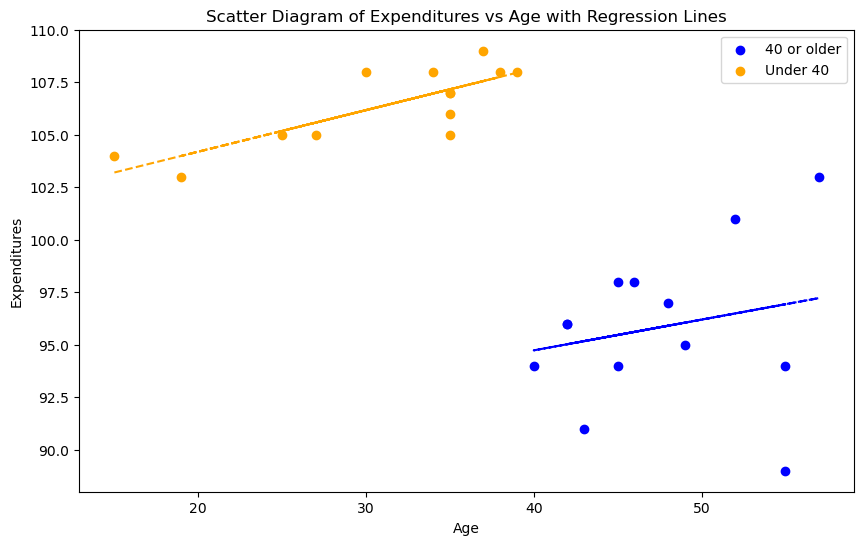

Model for clients aged 40 or older:
                            OLS Regression Results                            
Dep. Variable:           Expenditures   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.5507
Date:                Tue, 02 Jan 2024   Prob (F-statistic):              0.474
Time:                        12:08:05   Log-Likelihood:                -34.827
No. Observations:                  13   AIC:                             73.65
Df Residuals:                      11   BIC:                             74.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88

c:\Users\Gerardo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\Gerardo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
# Parece que necesitamos completar la parte (c) para los clientes menores de 40 años y corregir el gráfico.

# Vamos a cargar los datos nuevamente
data = pd.read_excel('TestExer1-holiday expenditures-round2.xls')

# Dividir la muestra en dos grupos: mayores o iguales a 40, y menores de 40
older_group = data[data['Age'] >= 40]
younger_group = data[data['Age'] < 40]

# Estimar los coeficientes para el grupo de clientes mayores o iguales a 40
X_older = sm.add_constant(older_group['Age'])
y_older = older_group['Expenditures']
model_older = sm.OLS(y_older, X_older).fit()

# Estimar los coeficientes para el grupo de clientes menores de 40
X_younger = sm.add_constant(younger_group['Age'])
y_younger = younger_group['Expenditures']
model_younger = sm.OLS(y_younger, X_younger).fit()

# Crear un gráfico de dispersión con líneas de regresión para cada grupo
plt.figure(figsize=(10, 6))

# Gráfico para el grupo mayor o igual a 40 años
plt.scatter(older_group['Age'], older_group['Expenditures'], color='blue', label='40 or older')
plt.plot(older_group['Age'], model_older.predict(X_older), color='blue', linestyle='--')

# Gráfico para el grupo menor de 40 años
plt.scatter(younger_group['Age'], younger_group['Expenditures'], color='orange', label='Under 40')
plt.plot(younger_group['Age'], model_younger.predict(X_younger), color='orange', linestyle='--')

plt.xlabel('Age')
plt.ylabel('Expenditures')
plt.title('Scatter Diagram of Expenditures vs Age with Regression Lines')
plt.legend()
plt.show()

# Imprimir los resultados de los modelos
print("Model for clients aged 40 or older:")
print(model_older.summary())
print("\nModel for clients younger than 40:")
print(model_younger.summary())


## Interpretación
While the generalized model shows a negative relationship between age and expenditure, a closer inspection shows that when dividing the sample into 2 groups (<40 and >40 years) the relationship is actually positive, and with higher significance for the younger group (consistently expending more as they age) until they hit 40 years old, at which their expenditure drops and becomes less stable (As shown by the low t-statistic and high p-value over t.

One could predict better the expenditures of a younger population than an older one. 


# Training exercise 2.1 

(a) Use dataset TrainExer21 to regress log-wage on a constant and the gender dummy ‘Female’, and check the
result presented in Lecture 2.1 that log(Wage) = 4.73 − 0.25Female + e.


(b) Let e be the series of residuals of the regression in part (a). Perform two regressions:

(i) e on a constant and education;

(ii) e on a constant and the part-time job dummy.


(c) Comment on the outcomes of regressions (i) and (ii) of part (b)

In [21]:
import pandas as pd
import statsmodels.api as sm

# Asumiendo que 'TrainExer21.xls' está en el mismo directorio que tu libreta de Jupyter.
# Si no, deberás cambiar la ruta para que apunte al directorio correcto.
df = pd.read_excel('TrainExer21.xls')

# a) Regresión del logaritmo de los salarios en la constante y la variable 'Female'.
X = df[['Female']]  # Variables independientes
X = sm.add_constant(X)  # Añade una constante al modelo
Y = df['LogWage']  # Variable dependiente

# Realiza la regresión OLS (Ordinary Least Squares)
model = sm.OLS(Y, X).fit()

# b) Realiza dos regresiones de los residuales
# i) Residuales sobre la constante y la educación
X_resid_educ = sm.add_constant(df['Educ'])
resid_model_educ = sm.OLS(model.resid, X_resid_educ).fit()

# ii) Residuales sobre la constante y el trabajo a tiempo parcial
X_resid_parttime = sm.add_constant(df['Parttime'])
resid_model_parttime = sm.OLS(model.resid, X_resid_parttime).fit()

# Muestra los resultados
print(model.summary())
print(resid_model_educ.summary())
print(resid_model_parttime.summary())


                            OLS Regression Results                            
Dep. Variable:                LogWage   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     39.01
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           9.05e-10
Time:                        11:26:28   Log-Likelihood:                -289.67
No. Observations:                 500   AIC:                             583.3
Df Residuals:                     498   BIC:                             591.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7336      0.024    194.449      0.0

## Regresión 1: Efecto del género sobre el logaritmo del salario

Coeficiente para 'Female': -0.2506
Valor t: -6.246
R^2: 0.073
Esta regresión indica que ser mujer está asociado con una disminución promedio en el logaritmo del salario de 0.2506, manteniendo todo lo demás constante. El valor t es significativamente negativo, lo que implica que esta diferencia es estadísticamente significativa. El R^2 de 0.073 significa que aproximadamente el 7.3% de la variabilidad en el logaritmo del salario se explica por el género.

## Regresión 2: Residuales de Regresión 1 en educación

Coeficiente para 'Educ': 0.2178
Valor t: 14.051
R^2: 0.284
Esta regresión muestra que, después de tener en cuenta el género, hay un efecto positivo significativo de la educación sobre los residuos de la primera regresión. El valor t positivo y grande significa que este efecto es estadísticamente significativo y el 
R^2 de 0.284 sugiere que el 28.4% de la variabilidad en los residuos de la primera regresión se puede explicar por la educación.

## Regresión 3: Residuales de Regresión 1 en trabajo a tiempo parcial

Coeficiente para 'Parttime': 0.0987
Valor t: 2.322
R^2: 0.011
El coeficiente positivo para 'Parttime' sugiere que, después de controlar por género, los trabajadores a tiempo parcial tienen un logaritmo de salario promedio ligeramente más alto en comparación con los trabajadores a tiempo completo. Sin embargo, el R^2 bajo indica que esta variable solo explica aproximadamente el 1.1% de la variabilidad en los residuos de la primera regresión.

## Conclusión
La regresión múltiple muestra que tanto el género como la educación tienen un efecto significativo en el logaritmo del salario, y el trabajo a tiempo parcial tiene un efecto menor pero aún significativo. Los resultados sugieren que la diferencia de género en los salarios persiste incluso después de controlar por educación y tipo de empleo (tiempo completo o parcial).